# **Project BTS**
### Author: Justin Yoon
### Digital Humanities 100 Summer 2021
### Instructor: Dr. Adam Anderson

In [1]:
pip install vaderSentiment

     |████████████████████████████████| 133kB 8.4MB/s 


In [2]:
pip install num2words

     |████████████████████████████████| 102kB 4.8MB/s 


In [3]:
import numpy as np
import pandas as pd
import io
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import random
import warnings
from matplotlib.pyplot import figure
from datetime import datetime
from google.colab import drive
from IPython.display import YouTubeVideo
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from collections import Counter
from num2words import num2words

import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

##**Notebook Summary**

This notebook is an introductory data analysis of BTS's worldwide critical acclaim. We will take three theories that is widely believe by many about BTS's ascendancy from the media and take those claims back to the data.

[**Data Science Philosophy and Methodology**](#phil)<br/>
Talks about the philosophy and the theory that is behind making this notebook.<br/><br/>
[**The Data**](#data)<br/>
Imports the data and gives citations and sources for the data.<br/><br/>
[**Exploratory Data Analysis**](#eda)<br/>
Before we "truly" go into the analysis, we play around with the data; about its shape, characteritics, type, and number of observations. We also have a section for "data quality check" when we discuss the credibility of our own data.<br/><br/>
[**Theory A: "Socially Conscious Messaging"**](#a)<br/>
<i>"Their lyrics are socially conscious and especially attuned to describing the pressures of modern teen life in South Korea." (Vox)</i><br/><br/>
This section compares BTS's lyrics compared to the lyrics of other popular artists using various methods such as VADER and word clouds to test whether or not we can see if they truly include significant amounts of negative social commentary.<br/><br/>
[**Theory B: Choreography and Energy**](#b)<br/>
<i>"South Korean performers who spend years in grueling studio systems learning to sing and dance in synchronized perfection." (Vox)<br/><br/>"Dynamite" was created in the hopes of bringing some vibrant energy that the world needs right now." (BBC)</i><br/><br/>
This section looks at the musical attributes of BTS, pre-measured by Spotify. Specifically, we want to look at the danceability and energy metrics to see whether or not BTS's music is truly well choreographed and contains high energy.<br/><br/>
[**Theory C: ARMY**](#c)<br/>
<i>"The BTS ARMY is real, and it is mighty" (Vox) <br/><br/> "The bond between BTS and their ARMY is real, and the guys have genuinely missed their fans" (Rolling Stone)</i><br/><br/>

This section looks at BTS's popularity over time, measured by the number of times they were searched on popular search engines.<br/><br/>
[**Conclusions, Future Questions, Final Thoughts**](#conc)<br/>

<a name="phil"></a>
##**Data Science Philosophy and Methodology**

Before we get into the main segments of the notebook, I wanted to discuss the philosophy and purpose that went into making this notebook. <br/><br/>
The purpose of this notebook is **not** necessarily scientific nor using state-of-the-art methodologies. Rather, I would like to use this notebook to create an inspiration for others to explore and endeavour into the new field of data science. Data science and its applications have truly made a large difference in the world, such as social media algorithms, FinTech (financial technologies), self-driving cars, operations research, and science. I expect that this paradigm shift towards data science will only continue as time passes.<br/><br/>
With that said, I created this project with two core principles in mind:<br/><br/>
1. An avoidance of "bad" data science
2. A more approachable data science 

By "bad" data science, I am not referring to the ethically dubious applications of data science such as personal data harvesting, hacking, or programming drones to be used as weapons. Rather, I am referring to unethical and misleading practices **within** the practice of data science.
<br/><br/>
[Data science](https://en.wikipedia.org/wiki/Data_science), as defined by Wikipedia, is "a 'concept to unify statistics, data analysis, informatics, and their related methods' [that] uses techniques and theories drawn from many fields within the context of mathematics, statistics, computer science, information science, and domain knowledge." By its very nature, data science is an [interdisciplinarity](https://en.wikipedia.org/wiki/Interdisciplinarity) field of study that requires practitioners to have a firm grasp of computer science, statistics and "domain knowledge" (knowledge specifically about the data we are studying). A failure to understand and practice all three disciplines often leads to "bad" data science, such as lack of generalizability of results, lack of understanding of what we are "truly" trying to study, and computational inefficiencies.<br/><br/>
**This notebook takes data quality checks, methodology transparency, domain knowledge application, and cross-validation fairly seriously to avoid errors.**

However, I also understand that many users of this notebook may not all be practitioners of computer science or statistics. **Another main goal of this notebook is to foster an environment of education of data science.** I do my best to explain the code and statistical processes that occur in the cells.<br/><br/>
On the other hand, creating "explainable" data science has always been difficult due to the high level of abstraction and training needed to use and understand the tools of modern data science. State-of-the-art tools such as [TensorFlow](https://en.wikipedia.org/wiki/TensorFlow), [Apache Spark](https://en.wikipedia.org/wiki/Apache_Spark), and [PyTorch](https://en.wikipedia.org/wiki/PyTorch) will not be used. Instead, we will be using comparatively more approachable tools such as [Pandas](https://en.wikipedia.org/wiki/Pandas_(software)), [VADER](https://github.com/cjhutto/vaderSentiment), and data visualization libraries ([Seaborn](https://seaborn.pydata.org/)) which are deemed to be less powerful, but still quite effective tools. <br/><br/>
**With that said, let's dive straight into the data!**

<a name="data"></a>
##**The Data**

In [5]:
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [6]:
lyrics = pd.read_csv (r'/content/gdrive/MyDrive/Justin_Yoon/Notebook/lyrics-v1.0.csv')
spotify = pd.read_csv (r'/content/gdrive/MyDrive/Justin_Yoon/Notebook/tracks.csv')
trends = pd.read_csv (r'/content/gdrive/MyDrive/Justin_Yoon/Notebook/BTS.csv').reset_index()
naver = pd.read_csv(r'/content/gdrive/MyDrive/Justin_Yoon/Notebook/BTS_naver.csv')

The dataframe `lyrics` contains 226 observations of BTS tracks and includes `album_title`, `track_title`, `lang` (the language of the song) and, most importantly, `lyrics` as features. This dataframe is provided by Kaggle user **kaili** who scraped this data from https://genius.com/  under a **CC0: Public Domain License**.
<br/><br/>

The dataframe `spotify` is also a Kaggle dataset by user **Yamac Eren Ay** who, by using the Spotify API, has scraped data from about around 600,000 tracks published on Spotify under **Community Data License Agreement – Sharing, Version 1.0**. 
<br/><br/>

*Note that the "full" dataset has over 15 million tracks and includes data about specific artists, but is over 3GB in storage.* 
<br/><br/>

This dataset provides information on easily gathered features such as `popularity` and `duration_ms`, but also Spotify measures their own audio features such as `danceability`, `energy`, `key`, `loudness`, `mode` and much more. 
The full description of these features can be found at https://developer.spotify.com/documentation/web-api/reference/#category-tracks under AudioFeaturesObject.

We will also be using another Kaggle dataset from user **Deep Shah** on the lyrical content of popular American artists. (Full list and data import can be found in Data Cleaning). It is published under a **CC0: Public Domain License**.

The final sets of data we will be using popular search engines. Google offers a service named [Google Trends](https://trends.google.com/trends/) that offers users quantitative data about the popularity of a search term, separated by country. Naver, the South Korean equivalent of Google, also offers a similar service, [Naver DataLab](https://datalab.naver.com/). *(Beware: Naver is a Korean site, but Google Translate should perform adequately here.)*

**The results of this analysis should be reproduceable with the respective public datasets.**


In [7]:
def data_stats(df):
  ##Input: A df derived from lyrics
  ##Output: Some statistics about the df
  tracks = df.shape[0]
  albums = len(df["album_title"].unique())
  print("There are "+str(tracks)+ " songs spread across "+str(albums)+" albums in this dataframe.")
data_stats(lyrics)

There are 226 songs spread across 18 albums in this dataframe.


<a name="clean"></a>
##**Data Cleaning**

Let's take a closer look at the data.

In [8]:
lyrics[lyrics["track_title"]=="Dynamite"] #Finds all tracks with "Dynamite" in the title

id                   album_title  ... lang has_full_ver
206  206    Dynamite (DayTime Version)  ...  ENG        False
212  212  Dynamite (NightTime Version)  ...  ENG        False
225  225                            BE  ...  ENG        False

[3 rows x 16 columns]

As you can see there is some redundant, data (from single releases, album rereleases, etc) and we do not want redundant data to bias our results. We will also filter out "intro" and "outro" songs as we deem them to be of little value lyrically.

In [9]:
copy = lyrics.copy()

We first copy the data (so that we can always go back to the full data if we omit too many songs).

In [10]:
copy = copy[copy["eng_track_title"].str.contains("Intro")!=True] #removes intros
copy = copy[copy["eng_track_title"].str.contains("Outro")!=True] #removes ontros
copy = copy[copy["eng_track_title"].str.contains("Skit")!=True] #removes skits
copy = copy.drop_duplicates(subset=["track_title"]) #removes duplicate tracks
copy = copy[pd.notna(copy["lang"])] #removes non-English and non-Korean tracks (instrumental tracks)
copy = copy[copy["performed_by"]== "BTS"] #removes tracks not performed by all of BTS (removes solo/duo tracks)
copy = copy[copy["remix"]!=True] #removes remixes (which offer the same lyrics)
clean_lyrics = copy

In [11]:
clean_lyrics[clean_lyrics["track_title"]=="Dynamite"] #We check that Dynamite is listed only once.

id                 album_title  ... lang has_full_ver
206  206  Dynamite (DayTime Version)  ...  ENG        False

[1 rows x 16 columns]

In [12]:
data_stats(clean_lyrics)

There are 89 songs spread across 17 albums in this dataframe.


Through cleaning, we cut the size of dataset in half.

###**Merging**

In [13]:
BTS_spotify = spotify[spotify["artists"].str.contains("BTS")] #Takes only BTS songs from spotify (spotify includes all artists from the US market)
BTS_spotify["pri"]= BTS_spotify["name"].str.replace(" ", "").str.replace(",", "").str.lower().str[0:15]
BTS_spotify = BTS_spotify.sort_values("popularity", ascending= False)
BTS_spotify = BTS_spotify.drop_duplicates(subset=["pri"]) #Deletes repeated tracks with lower popularity
BTS_spotify = BTS_spotify[BTS_spotify["name"].str.contains("Japan")!=True] #removes Japanese rereleases
BTS_spotify = BTS_spotify[BTS_spotify["name"].str.contains("Remix")!=True] #removes remixes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


To better analyze our data, we need to merge them. But, we notice that the datasets have **no primary key** to merge on, so we use `track_title` (from `lyrics`) and `name` (from `spotify`).

In [14]:
clean_lyrics.merge(BTS_spotify, how = "inner", left_on= "track_title", right_on= "name").shape

(5, 37)

But, it turns out `track_title` and `name` are not good primary keys to merge on! (The merge only resulted in 5 tracks.)

In [15]:
clean_lyrics["pri"] = clean_lyrics["eng_track_title"].str.replace(" ", "").str.lower().str[0:15]
BTS_spotify["pri"]= BTS_spotify["name"].str.replace(" ", "").str.replace(",", "").str.lower().str[0:15]

Using trial and error (and through our understanding of BTS songs), we find that using the **first 15 letters of each track is good enough to use as a primary key** to link the datasets. We manually check for errors. This method preserves 93 merged observations.

In [16]:
merged = clean_lyrics.merge(BTS_spotify, how = "inner", on="pri")
data_stats(merged)

There are 72 songs spread across 17 albums in this dataframe.


In [17]:
len(merged["id_x"].unique())== merged.shape[0]  #checks that all values of clean_lyrics are unique

True

In [18]:
len(merged["lyrics"].unique())== merged.shape[0] #checks that lyrics are also unique

True

Above is what our merged dataset looks like. **We started from 226 observations to 72 observations through cleaning and merging** and deem this to be a good candidate to do further data analysis. We cleaned out 137 observations in the cleaning stage (removing irrelevant tracks) and 17 more tracks in the merging process.

*The 17 tracks removed in merging come from many sources: some from translation of title issues and others from datasets not containing the corresponding track.*

The cells below further loads and cleans other imported datasets. Comments are added to improve clarity.

In [19]:
merged["clean"] = merged["lyrics"].str.lower().str.replace("\\n", " ", regex = True).str.replace("\([\w\s]*\)", "", regex = True)
clean_lyrics["clean"] = clean_lyrics["lyrics"].str.lower().str.replace("\\n", " ", regex = True).str.replace("\([\w\s]*\)", "", regex = True) 
#cleans up the lyrics for text analysis

In [20]:
clean_trends = trends.rename(columns= {trends.columns[0]: "time", 
                        trends.columns[1]: "US",
                        trends.columns[2]: "Brazil",
                        trends.columns[3]: "South Korea",
                        trends.columns[4]: "Mexico",
                        trends.columns[5]: "Philippines"}).iloc[1:]
#resets and renames the columns

In [21]:
def convert_to_zero(country):
  clean_trends.loc[clean_trends[country] == '<1', country] = 0
  clean_trends[country] = clean_trends[country].astype(int)
for i in clean_trends.columns[1:]:
  convert_to_zero(i)
# converts str to int on the time series and converts all instances of <1 to 0

In [22]:
clean_trends["time"] = pd.to_datetime(clean_trends["time"]) 
# converts time to datetime object
clean_trends = clean_trends.set_index("time") 
#sets index to time
naver = naver.rename(columns = {naver.columns[0]: "time", naver.columns[1]: "popularity"})
naver["time"] = pd.to_datetime(naver["time"])
naver = naver.set_index("time")
#does the same for the naver time series

In [23]:
analyzer = SentimentIntensityAnalyzer()
merged['rating'] = merged['clean'].apply(analyzer.polarity_scores)
merged = pd.concat([merged.drop(['rating'], axis=1), merged['rating'].apply(pd.Series)], axis=1)
analyzer = SentimentIntensityAnalyzer()
clean_lyrics['rating'] = clean_lyrics['clean'].apply(analyzer.polarity_scores)
clean_lyrics = pd.concat([clean_lyrics.drop(['rating'], axis=1), clean_lyrics['rating'].apply(pd.Series)], axis=1)
#adds VADER score to BTS lyrics

In [24]:
ariana_grande = pd.read_csv(r'/content/gdrive/MyDrive/Justin_Yoon/Notebook/Lyrics/csv/ArianaGrande.csv')
beyonce = pd.read_csv(r'/content/gdrive/MyDrive/Justin_Yoon/Notebook/Lyrics/csv/Beyonce.csv')
billie_eilish = pd.read_csv(r'/content/gdrive/MyDrive/Justin_Yoon/Notebook/Lyrics/csv/BillieEilish.csv')
cardib = pd.read_csv(r'/content/gdrive/MyDrive/Justin_Yoon/Notebook/Lyrics/csv/CardiB.csv')
charlie_puth = pd.read_csv(r'/content/gdrive/MyDrive/Justin_Yoon/Notebook/Lyrics/csv/CharliePuth.csv')
coldplay = pd.read_csv(r'/content/gdrive/MyDrive/Justin_Yoon/Notebook/Lyrics/csv/ColdPlay.csv')
drake = pd.read_csv(r'/content/gdrive/MyDrive/Justin_Yoon/Notebook/Lyrics/csv/Drake.csv')
dualipa = pd.read_csv(r'/content/gdrive/MyDrive/Justin_Yoon/Notebook/Lyrics/csv/DuaLipa.csv')
ed_sheeran = pd.read_csv(r'/content/gdrive/MyDrive/Justin_Yoon/Notebook/Lyrics/csv/EdSheeran.csv')
eminem = pd.read_csv(r'/content/gdrive/MyDrive/Justin_Yoon/Notebook/Lyrics/csv/Eminem.csv')
JB = pd.read_csv(r'/content/gdrive/MyDrive/Justin_Yoon/Notebook/Lyrics/csv/JustinBieber.csv')
katy_perry = pd.read_csv(r'/content/gdrive/MyDrive/Justin_Yoon/Notebook/Lyrics/csv/KatyPerry.csv')
khalid = pd.read_csv(r'/content/gdrive/MyDrive/Justin_Yoon/Notebook/Lyrics/csv/Khalid.csv')
ladygaga = pd.read_csv(r'/content/gdrive/MyDrive/Justin_Yoon/Notebook/Lyrics/csv/LadyGaga.csv')
m5 = pd.read_csv(r'/content/gdrive/MyDrive/Justin_Yoon/Notebook/Lyrics/csv/Maroon5.csv')
nicki_minaj = pd.read_csv(r'/content/gdrive/MyDrive/Justin_Yoon/Notebook/Lyrics/csv/NickiMinaj.csv')
post_malone = pd.read_csv(r'/content/gdrive/MyDrive/Justin_Yoon/Notebook/Lyrics/csv/PostMalone.csv')
rihanna = pd.read_csv(r'/content/gdrive/MyDrive/Justin_Yoon/Notebook/Lyrics/csv/Rihanna.csv')
selena_gomez = pd.read_csv(r'/content/gdrive/MyDrive/Justin_Yoon/Notebook/Lyrics/csv/SelenaGomez.csv')
taylor_swift = pd.read_csv(r'/content/gdrive/MyDrive/Justin_Yoon/Notebook/Lyrics/csv/TaylorSwift.csv')
#imports lyrics data of popular American artists

*Try not to run the 2 cells below too many times; it should take from around 30 seconds to 5 minutes to complete. It's quite a lot of computations, though there are only a few lines of code.*

In [25]:
def add_sentiment(df, lyrics):
  #input: df with lyrics
  #output: same df with VADER scores added
  analyzer = SentimentIntensityAnalyzer()
  df = df.dropna(subset= ['Lyric'])
  df['rating'] = df[lyrics].apply(analyzer.polarity_scores)
  return pd.concat([df.drop(['rating'], axis=1), df['rating'].apply(pd.Series)], axis=1)

In [26]:
pop_artists = pd.concat([ariana_grande, beyonce, billie_eilish, cardib, charlie_puth, coldplay, drake,
                         dualipa, ed_sheeran, eminem, JB, katy_perry, khalid, ladygaga, m5, nicki_minaj,
                         post_malone, rihanna, selena_gomez, taylor_swift])
pop_artists = pop_artists[pop_artists["Title"].str.contains("Intro")!=True] #removes intro's
pop_artists = pop_artists[pop_artists["Title"].str.contains("Outro")!=True] #removes outro's
pop_artists = pop_artists[pop_artists["Title"].str.contains("Remix")!=True]
pop_artists = pop_artists[pop_artists["Title"].str.contains("Mix")!=True]
pop_artists = pop_artists[pop_artists["Title"].str.contains("mix")!=True]
pop_artists = pop_artists[pop_artists["Title"].str.contains("Version")!=True]
pop_artists = pop_artists[pop_artists["Title"].str.contains("Acoustic")!=True]
pop_artists = pop_artists[pop_artists["Title"].str.contains("Edit")!=True]
pop_artists = pop_artists[pop_artists["Title"].str.contains("Live")!=True] #removes different versions's
pop_artists = pop_artists[pop_artists["Title"].str.contains("Demo")!=True] #removes demo's
pop_artists = add_sentiment(pop_artists, "Lyric")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<a name="eda"></a>
## **Exploratory Data Analysis**

###**Data Quality Check**

As data scientists, we have to understand the methodology we are using to measure our subject. In this case, we have many cultural goods (BTS songs) that come pre-analyzed from Spotify. Especially in subjective contexts like these, we need to consistently check the quality and purity of our data in order to make sure that our results are sensible and reliable. Before moving on to the EDA, we want to dive into the data ourselves to truly see if that data is "faithful" to what it is trying to measure.

BTS's most **danceable** tracks?

In [27]:
merged.sort_values("danceability", ascending= False).iloc[0:5]["name"]

19    Look Here
46        Go Go
53     Anpanman
4         We On
70    Telepathy
Name: name, dtype: object

Judge for yourself!

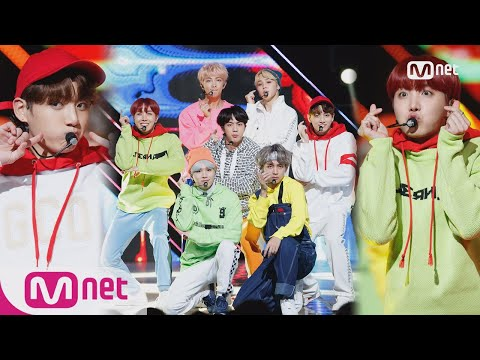

In [28]:
YouTubeVideo("TEl6KgcfSA8")

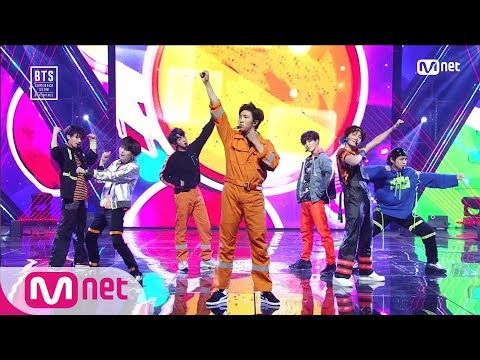

In [29]:
YouTubeVideo("qkLMPihvKaQ")

Spotify states that "Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable."

BTS's highest **energy** tracks?

In [30]:
merged.sort_values("energy", ascending= False).iloc[0:3]["name"]

15    War of Hormone
12              Jump
29           Ma City
Name: name, dtype: object

Judge for yourself!

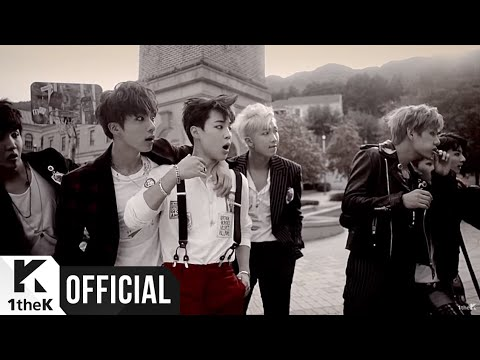

In [31]:
YouTubeVideo("XQmpVHUi-0A")

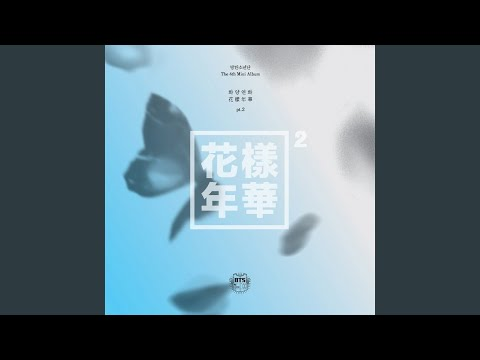

In [32]:
YouTubeVideo("MlM1fbaHZTQ")

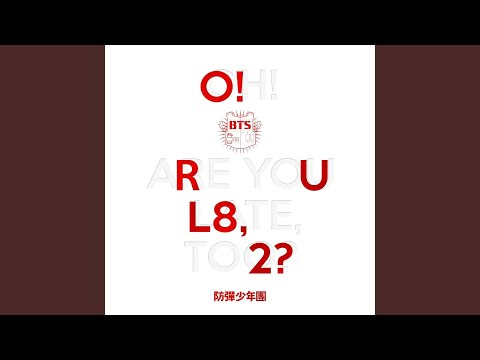

In [33]:
YouTubeVideo("qPC5s_R6cfE")

Spotify states that "Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy."

Highest **Valence** Tracks (valence = positivity, happiness)

In [34]:
merged.sort_values("valence", ascending= False).iloc[0:3]["name"]

25        Moving On
49         Paradise
52    Airplane pt.2
Name: name, dtype: object

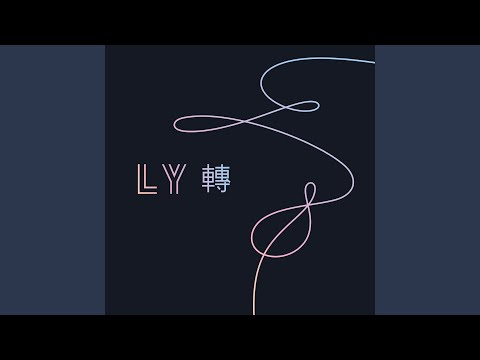

In [35]:
YouTubeVideo("obH7iPDAn2Q")

Lowest **Valence** Tracks

In [36]:
merged.sort_values("valence", ascending= True).iloc[0:5]["name"]

16                         Let Me Know
0     We are Bulletproof : the Eternal
1     We are Bulletproof : the Eternal
62                           Jamais Vu
60                       Make It Right
Name: name, dtype: object

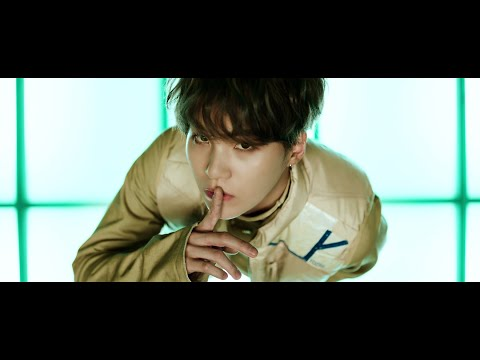

In [37]:
YouTubeVideo("PV1gCvzpSy0")

Spotify states that "A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)."

Now, let's take a look at the lyrics themselves. <br/><br/>
We have to understand the BTS performs their songs in English AND Korean (meaning that certain songs are exclusively English, some exclusively Korean and many contain English and Korean in one song). Furthermore, BTS also happens to rerelease many of their songs in Japanese (though our dataset omits this). <br/><br/>
Translation of artistic works as such is notoriously hard and academics still debate on which version/method is the most "representative" of the original untranslated work. <br/><br/>

Furthermore, digital text analysis and NLP ([natural language processing](https://en.wikipedia.org/wiki/Natural_language_processing)) in multiple languages is also incredibly difficult for [multiple reasons](https://analyticsindiamag.com/how-nlp-can-tackle-the-challenge-of-multiple-languages/). One challenge is to find the Korean equivalent of VADER for language that's hard to tokenize. Another glaring challenge for us with VADER is that we have no way of confirming that the weights (sentiment scores) are "proportionate." <br/><br/>

e.g. In BTS's song [FAKE LOVE](https://www.youtube.com/watch?v=7C2z4GqqS5E&ab_channel=HYBELABELS), the word "love" in the lyrics must give the same sentiment as the word "[사랑](https://en.wiktionary.org/wiki/%EC%82%AC%EB%9E%91)" when both words are used multiple times throughout the song. This is not always guaranteed with different versions of VADER.<br/><br/>

To depart from these logistical and, potentially, unsolveable hurdles, the data that we import in the first place is translated into English by [Genius](https://genius.com/). We defend the use of 3rd party translated lyrics in our data analysis because a vast majority of BTS's fans are not fluent in **BOTH** Korean and English. This leads us to infer that fans are searching for the true meaning of the songs through the Internet with sites such as [Genius](https://genius.com/). <br/><br/>

But, we must also confirm that Genius's translations are indeed well-translated. To check of all 72 observations would be very arduous with little gain. We, therefore, sample a subset of our dataframe. Throughout this notebook's creation process, I have done many more "lyrical checks" (approximately in the 20's). We will only sample 3 for the sanity of the reader.

In [38]:
sample = merged.sample(3, random_state=10)[["name", "clean"]]
sample

name                                              clean
69  Blue & Grey  where is my angel? the end of the day someone ...
3           N.O  a good house, a good car, will these things br...
26          Run  you’re my sun, the one and only in this world ...

In [39]:
np.array(sample["clean"])[0] #Blue & Grey

"where is my angel? the end of the day someone come and save me, please a weary sigh of a tiring day i guess everyone's happy can you look at me? 'cause i am blue and grey the meaning of the tears reflected in the mirror my color hidden with a smile, blue and grey i don't know where it went wrong since my youth, i've had a blue question mark in my head maybe that's why i've been living so fiercely but when i look back, i'm all by myself that hazy shadow that swallows me up the blue question mark still exists is it anxiety or depression? how am i so regretful? or is it just me, one that loneliness gave birth to i still don't know, the ferocious blue i hope i don't erode away, i'll find the exit i just wanna be happier to melt the cold me my hands have reached out countless times colorless echo oh, this ground feels so heavier i am singing by myself i just wanna be happier am i being too greedy? i felt when i walked on the cold winter streets the sound of my fast heartbeat breathing i st

[AZLyrics](https://www.azlyrics.com/lyrics/bangtanboys/bluegrey.html)
<br/>
[Doolset Lyrics](https://doolsetbangtan.wordpress.com/2020/11/20/blue-and-grey/)
<br/>
[Color Coded Lyrics](https://colorcodedlyrics.com/2020/11/bts-bangtansonyeondan-blue-amp-grey)

In [40]:
np.array(sample["clean"])[1] #N.O	

"a good house, a good car, will these things bring happiness? in seoul to the sky, would your parents be happy?  dream is gone, no time to breathe school, house and pc room is all we have we live the same life and have to become number one for us it's like a double spy between dream and reality  who is the one who made us into study machines? it's either number one or a failure they trap us in borders, the adults there’s no choice but to consent even if we think simply, it’s the survival of the fittest who do you think is the one who makes us step on even our close friends to climb up? what?  adults tell me that hardships are only momentary to endure a little more, to do it later  everybody say no! it's not going to work anymore don't be captured in others dreams we roll  we roll  we roll everybody say no! it has to be now we've done nothing yet we roll  we roll  we roll everybody say no!  a good house, a good car, will these things bring happiness? in seoul to the sky, would your pare

[AZLyrics](https://www.azlyrics.com/lyrics/bangtanboys/no.html)<br/>
[Doolset Lyrics](https://doolsetbangtan.wordpress.com/2018/12/15/n-o/)<br/>
[Color Coded Lyrics](https://colorcodedlyrics.com/2013/09/bts-bangtansonyeondan-n-o)

In [41]:
np.array(sample["clean"])[2] #Run

'you’re my sun, the one and only in this world i bloom for you, but you make me thirsty it’s too late, too late i can’t live without you even if i‘m drying out, i try harder to reach you  but it’s no use, it’s a dream to be broken i run and run, but i’m not getting anywhere just burn me out, yes keep pushing me away this is a fool, crazy in love, chasing in circles  make me run make me run more let my feet rip apart with wounds at least i can smile when i see you  i run, run, run i can’t stop run, run, run again i can’t help it this is all i can do anyway all i know is how to love you run, run, run again it’s okay to fall run, run. run, again it’s okay to get hurt i’m alright, even if i can’t have you pitiful destiny, point your finger at me  don’t tell me bye bye  you make me cry cry  love is a lie lie don’t tell me, don’t tell me don’t tell me bye bye  everyone says it’s over, but i can’t stop is this sweat or tears, i can’t really tell oh my love stripped bare, the stormy winds they

[AZLyrics](https://www.azlyrics.com/lyrics/bangtanboys/run.html)<br/>
[Doolset Lyrics](https://doolsetbangtan.wordpress.com/2018/07/02/run/)<br/>
[Color Coded Lyrics](https://colorcodedlyrics.com/2015/11/bts-bangtansonyeondan-run)

####**Comments on the quality of lyrical data** <br/>
1. Overall, the quality of Genius's lyrics were quite good. Being a native Korean speaker myself, I was able to go back to the "original" lyrics when the sources conflicted and check for the meaning myself. Genius's translations were, more or less, accurate all of the time.

2. Translators seem to struggle with "poetic/metaphorical" verses, which was to be expected. Genius erred on the side of the "literal" translation; others, particularly Doolset, erred on the "metaphorical" translation.

3. I truly understand the troublesome task of running NLP on "poems", particularly mulitlingual poems. Koreans use a lot of "English-derived" words in their everyday language that add another layer to BTS's lyrics. <br/><br/>
The chorus of N.O sung by RM (Genius Translation): <br/><br/>
`In Seoul`<br/>
`To the sky,`<br/>
`부모님은 정말 행복해질까? (Would your parents be happy?)`<br/><br/>
In this context, "In Seoul" and "To the sky" mean things to the traditionally English-speaking audience something they would not expect. ["In Seoul"](https://namu.wiki/w/%EC%9D%B8%EC%84%9C%EC%9A%B8%20%EB%8C%80%ED%95%99%EA%B5%90) refers to comparatively prestigious universities in Korea (as compared to those lower-ranked ones outside of Seoul). "Sky" in this context is referring to [SKY](https://en.wikipedia.org/wiki/SKY_(universities)), an acronym to represent Korea's top colleges (Korea's equivalent of Harvard, Yale, Princeton). The chorus could be translated to "Will my parents be proud of me if I get into a prestigious university?"<br/><br/>

Analyzing English poetry with NLP is already a sufficiently arduous task. Training a machine to understand borrowed English words with their own Korean meaning within the context of symbolic lyrics is simply herculean and gives us more of a reason to stay away from the untranslated lyrics. This may be why academic literature of English translation of "Universal NLP" may be hard to come by in an undergraduate-approachable way.<br/><br/>

But, overall, I believe the Genius translation to be faithful to the lyrics (at least in a literal approach) and we will continue with the EDA.


### **Data Exploration**

In [42]:
def num_obv(df):
  #Input: A data frame
  #Output: the number of observations it has
  return df.shape[0]

Wow! We have **a lot of data** from a lot of different sources. It is often good practice to look closely into our data and play around for our understanding. Let's take a closer look at our data frames!

In [43]:
clean_lyrics.loc[:,['eng_track_title','clean', 'compound']].head()

eng_track_title  ... compound
1   We Are Bulletproof Pt.2  ...   0.9965
3             No More Dream  ...   0.9954
5                 I Like It  ...   0.9996
8                 Road/Path  ...  -0.8213
10                      N.O  ...   0.9948

[5 rows x 3 columns]

In [44]:
pop_artists.sample(5, random_state= 1).loc[:, ['Artist', "Title", "Lyric", "compound"]] 

Artist  ... compound
70     Post Malone  ...  -0.9931
95          Eminem  ...   0.9995
278  Ariana Grande  ...   0.3182
79    Taylor Swift  ...  -0.9929
46        Maroon 5  ...  -0.9525

[5 rows x 4 columns]

The dataframe `clean_lyrics` and `pop_artists` contains tracks, their lyrics, and `compound` (a score given by VADER on the sentiment of the lyrics). `clean_lyrics` contains only BTS tracks while `pop_artists` contains tracks from many pop artists.<br/><br/> 
*More on VADER and its interpretation in Theory A.*

In [45]:
print('clean_lyrics contains '+str(num_obv(clean_lyrics))+' observations and pop_artists contains '+ str(num_obv(pop_artists))+ ' observations')

clean_lyrics contains 89 observations and pop_artists contains 4252 observations


We can see that there are many more observations of other pop artists than BTS.

Let's now take a look at the `spotify` data frame.

In [46]:
spotify.sample(5, random_state= 7)

id  ... time_signature
379553  3Q76RJ43ot3GrOSW8tE2MQ  ...              4
58234   6fZ6zlZxGibSZzwvVaQQ6m  ...              4
518412  7JhdcLKc5uVcZZlOPGtFb2  ...              3
287893  2gL6EGNAxZAobmPJFosVDW  ...              4
36449   61oQiW7TRYrQGQndX8QQ8m  ...              4

[5 rows x 20 columns]

As you can see, it contains as columns <br/>
* `id` (A unique primary key of the track)
* `name` (The name of the track)
* `popularity` (A popularity score out of 100)
* `duration_ms` (The duration of the song in milliseconds)
* `explicit` (1 if the song is listed under the explicit tag, 0 else)
* `artists` (A list of artists in the track)
* `id_artists` (The corresponding primary keys of the artists)
* `release_date` (The release date of the track in YYYY-MM-DD format)
* `danceability` ("Danceability describes how suitable a track is for dancing based on a combination of musical elements including **tempo, rhythm stability, beat strength, and overall regularity**. A value of 0.0 is least danceable and 1.0 is most danceable.")
* `energy` ("Energy is a measure from 0.0 to 1.0 and represents **a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.** For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.")
* `key` ("The key the track is in. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on.")
* `loudness` ("The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.")
* `mode` ("Mode indicates the **modality (major or minor) of a track, the type of scale from which its melodic content is derived**. Major is represented by 1 and minor is 0.")
* `speechiness` ("**Speechiness detects the presence of spoken words in a track.** The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.")
* `acousticness` ("A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.")
* `instrumentalness` ("**Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context.** Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.")
* `liveness` ("**Detects the presence of an audience in the recording.** Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.")
* `valence` ("A measure from 0.0 to 1.0 describing the **musical positiveness conveyed by a track.** Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).")
* `tempo` ("The overall estimated tempo of a track in **beats per minute (BPM)**. In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.")
* `time_signature` ("An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).")

In [47]:
print("spotify has "+ str(num_obv(spotify))+ " observations")

spotify has 586672 observations


Wow! That's so many instances of data! That is to be expected, though. It does contain data on **all tracks listed on Spotify** in the US market.

Now, let's look at the `clean_trends` data frame.

In [48]:
clean_trends

US  Brazil  South Korea  Mexico  Philippines
time                                                    
2013-07-01   0       0            1       0            3
2013-08-01   0       0            1       0            3
2013-09-01   0       0            1       0            2
2013-10-01   0       0            1       0            4
2013-11-01   0       0            1       0            4
...         ..     ...          ...     ...          ...
2021-02-01   7      11           29      20           55
2021-03-01   8      11           28      24           59
2021-04-01   8      12           25      26           62
2021-05-01  12      15           31      30           69
2021-06-01  13      13           35      38           84

[96 rows x 5 columns]

It gives a normalized score (from 0 to 100) about how many times BTS was used as a search term segmented by month (in the YYYY-MM-DD format) and by five representative countries. *(Google Trends does not allow exportation of a csv file of more than 5 countries.)*

In [49]:
print("clean_trends has "+ str(num_obv(clean_trends))+ " observations (or months of recorded data)")

clean_trends has 96 observations (or months of recorded data)


In summary,
* `clean_lyrics`: BTS lyrics with sentiment scores
* `pop_artists`: Other pop artist lyrics with sentiment scores
* `spotify`: Spotify data; gives Spotify's own pre-measured metrics on all listed tracks on Spotify
* `clean_trends`: The popularity of BTS as a search term in 5 countries segmented by months

Let's try to visualize the data that we have on some interesting charts!

This is BTS's top 5 most popular tracks.

In [50]:
BTS_spotify.sort_values("popularity", ascending= False).head()

id  ...              pri
92830  4saklk6nie3yiGePpBwUoc  ...         dynamite
92865  249gnXrbfmV8NG6jTEMSwD  ...       lifegoeson
93818  3UHPGOkUcE4hE7sqBF4Snt  ...          filmout
91927  5KawlOMHjWeUjQtnuRs22c  ...  boywithluv(feat
93197  0n2moJpAEWHwaPYYjkzMDl  ...        blue&grey

[5 rows x 21 columns]

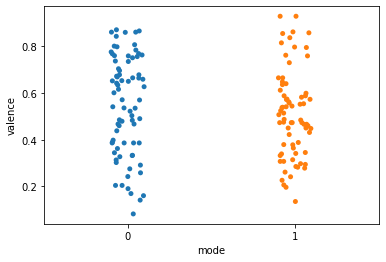

In [51]:
sns.stripplot(data= BTS_spotify, x = "mode", y = "valence");

In the chart above, we can see that BTS's mode (use of major (1) or minor (0)) keys have very little correlation with valence (Spotify's measure of positivity).

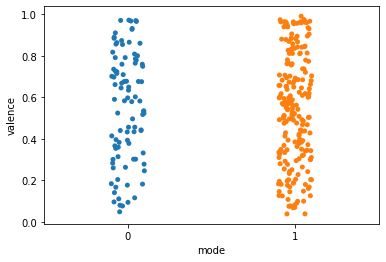

In [52]:
sns.stripplot(data= spotify.sample(300, random_state= 100), x = "mode", y = "valence");

We can also see that this is reproduceable with most of the data listed on Spotify.

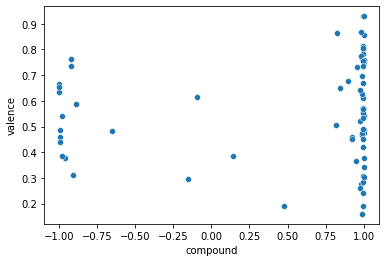

In [53]:
 sns.scatterplot(x= merged["compound"], y= merged['valence']);

We also wanted to see if the compound score (positivity score of lyrics) and valence score (positive score of music) were correlated. It turns out that they have little relation! In other words, **the lyrical content, whether positive or sad, have little to do with the music (the beat, bass, chords, etc)**

In [54]:
x = pd.DataFrame(columns=clean_trends.columns)
for i in clean_trends.columns:
  y = clean_trends[clean_trends[i] == max(clean_trends[i])]
  x= x.append(y)
x

US Brazil South Korea Mexico Philippines
2019-05-01  14     20          52     16          47
2019-05-01  14     20          52     16          47
2020-06-01   8     20          29     22          90
2019-04-01  12     13          52     19          54
2019-05-01  14     20          52     16          47
2021-06-01  13     13          35     38          84
2020-08-01   9     19          38     22         100

May 2019 must've been a very significant date! Let's take a look on what happened with BTS in April of 2019.

In [55]:
merged[merged['release_date'].str.contains("2019-04")].loc[:, ['album_title', 'track_title', "release_date"]]

album_title         track_title release_date
59  MAP OF THE SOUL: PERSONA  소우주 (Mikrokosmos)    2019-04-12
60  MAP OF THE SOUL: PERSONA      Make It Right    2019-04-12
61  MAP OF THE SOUL: PERSONA               HOME    2019-04-12
62  MAP OF THE SOUL: PERSONA          Jamais Vu    2019-04-12
63  MAP OF THE SOUL: PERSONA           Dionysus    2019-04-12

Wow! It seems our data is pointing towards the fact that a month after the release of the album "MAP OF THE SOUL: PERSONA," BTS's popularity peaked in 3 countries. 

*This concludes the EDA section of the notebook.*

<a name="a"></a>
##**Theory A: "Socially Conscious Messaging"**

### **Sentiment Analysis**

In [56]:
def find_artist(df, artist):
  return df[df["Artist"].str.contains(artist)]
def hist(df, artist):
  #input: the pop_artists data frame
  #output: a histogram of pop artist's VADER sentiment
  data = find_artist(df, artist)["compound"]
  sns.histplot(data = data, stat = "probability", bins = 50)
  plt.ylim(0, .8)

Let's take a look at the `pop_artists`data frame

In [57]:
pop_artists.sample(3, random_state= 10)

Artist                              Title  ...    pos compound
14      Katy Perry                      Teenage Dream  ...  0.168   0.9942
160    Nicki Minaj  25 Things You Don’t Know About Me  ...  0.117   0.9432
6    Billie Eilish                 ​wish you were gay  ...  0.172   0.9864

[3 rows x 11 columns]

As you can see `pop_artists` includes tracks from a lot of popular American artists, their lyrics, and their VADER sentiment score. Here is a list of all the pop artists in the data frame and the number of tracks they have.

In [58]:
pop_artists.groupby("Artist").count()[["Title"]]

Title
Artist              
Ariana Grande    243
Beyoncé          233
Billie Eilish     82
Cardi B           68
Charlie Puth      63
Coldplay         234
Drake            419
Dua Lipa         131
Ed Sheeran       201
Eminem           460
Justin Bieber    267
Katy Perry       229
Khalid            52
Lady Gaga        272
Maroon 5         123
Nicki Minaj      286
Post Malone      128
Rihanna          248
Selena Gomez     124
Taylor Swift     389

Let's take an even close look into `pop_artists` to check for quality.

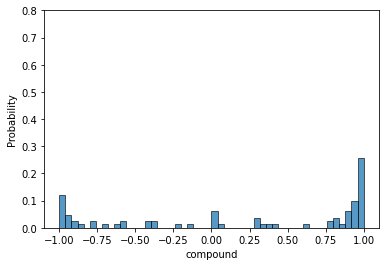

In [59]:
hist(pop_artists, "Billie Eilish") 
#Creates a histogram of Billie Eilish's sentiment

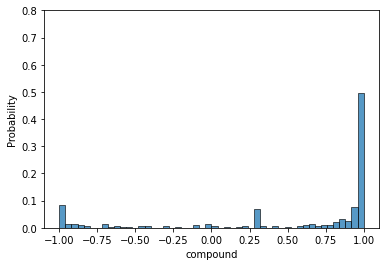

In [60]:
hist(pop_artists, "Taylor Swift")
#Creates a histogram of Taylor Swift's sentiment

Using our understanding of pop music today, we know that Billie Eilish's lyrical contents are much darker than Taylor Swift's. This is evidence enough to us that VADER is doing a good job at rating sentiment based on lyrics. Let's now take a look at the distribution of lyrical sentiment of all artists.

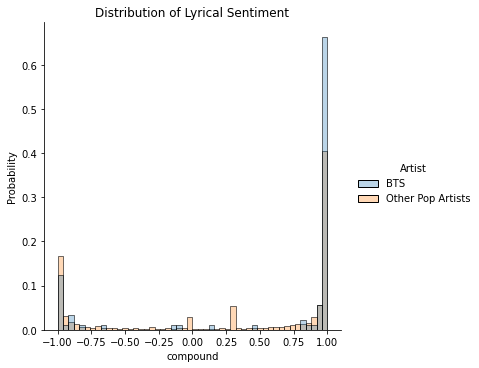

In [61]:
x = clean_lyrics[["compound"]].copy()
x["Artist"] = 'BTS'
y = pop_artists[["compound"]].copy()
y["Artist"] = 'Other Pop Artists'
full = pd.concat([x, y])
sns.displot(full, x= 'compound', stat = 'probability', hue = 'Artist', 
            common_norm=False, bins = 50, alpha = 0.3)
plt.title("Distribution of Lyrical Sentiment");

We can clearly see that **BTS proportionally has much more positive lyrics songs than the US pop artists.** Furthermore, we can also see that **BTS has less negative lyrics than the US pop artists.** <br/><br/>

*Here, observations closer to 1 mean they have a positive lyrical content while -1 mean that they have a negative lyrics content.<br/> (i.e. A song about flowers, love and family probably have a score closer to 1 while a song about death, depression, and enemies have a score closer to -1.)*

---------------------------------------

Free free to play around with the data! <br/><br/>
In the cell below, you can set `artist_name` to the name of your favorite artist (provided that they are in the list above) to check out the distribution of their songs.
<br/><br/>
For example, `artist_name = 'Justin Bieber'` would result in the histogram of Justin Bieber tracks.
<br/><br/>
*Note:* `artist_name = ''` *results in the histogram of all artists and the string is **case-sensitive** (B is different from b).*

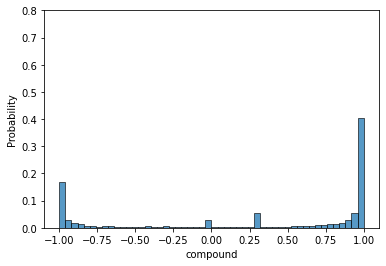

In [62]:
artist_name = ''
hist(pop_artists, artist_name)

###**Most Used Words**

The code below is not mine, but of my GSI Ash Tan's. Its higher order function is to "clean" out lyrics data and filter stop words, filter punctuations, and make lyrics data easier to handle in general. [Here](https://github.com/AshQTan/W266_Project/blob/main/SummarizationEvaluation.ipynb)  is the notebook that I am referencing.

In [63]:
def remove_stop_words(data):
    stop_words = stopwords.words('english')
    words = word_tokenize(str(data))
    new_text = ""
    for w in words:
        if w not in stop_words and len(w) > 1:
            new_text = new_text + " " + w
    return new_text
  
def remove_common_words(data):
    common_words = ["im", "yeah" , "oh", 'say', 'let', 'go', 'na', 'cant']
    words = word_tokenize(str(data))
    new_text = ""
    for w in words:
        if w not in common_words and len(w) > 1:
            new_text = new_text + " " + w
    return new_text

def remove_punctuation(data):
    symbols = "!\"#$%&()*+-./:;<=>?@[\]^_`{|}~\n"
    for i in range(len(symbols)):
        data = np.char.replace(data, symbols[i], ' ')
        data = np.char.replace(data, "  ", " ")
    data = np.char.replace(data, ',', '')
    return data

def remove_apostrophe(data):
    return np.char.replace(data, "'", "")

def convert_numbers(data):
    tokens = word_tokenize(str(data))
    new_text = ""
    for w in tokens:
        try:
            w = num2words(int(w))
        except:
            a = 0
        new_text = new_text + " " + w
    new_text = np.char.replace(new_text, "-", " ")
    return new_text

def preprocess(data):
    data = remove_punctuation(data) #remove comma seperately
    data = remove_apostrophe(data)
    data = remove_stop_words(data)
    data = convert_numbers(data)
    data = remove_common_words(data)
    #data = stemming(data)
    data = convert_numbers(data)
    #data = stemming(data) #needed again as we need to stem the words
    data = remove_punctuation(data) #needed again as num2word is giving few hypens and commas fourty-one
    data = remove_stop_words(data) #needed again as num2word is giving stop words 101 - one hundred and one
    return data
  
def process(dataset):
    processed_text = []
    for i in dataset:
        processed_text.append(str(preprocess(i)))
    return processed_text

In [64]:
def word_cloud(lyric):
  figure(figsize=(8, 6), dpi=80)
  wordcloud = WordCloud().generate(" ".join(process(lyric)))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

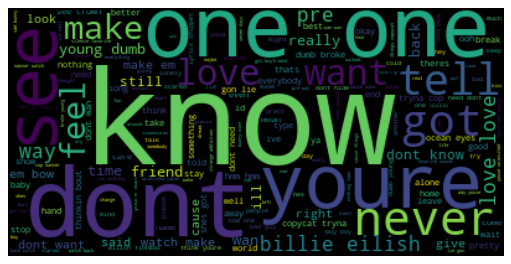

In [65]:
word_cloud(find_artist(pop_artists, "Billie Eilish")["Lyric"])

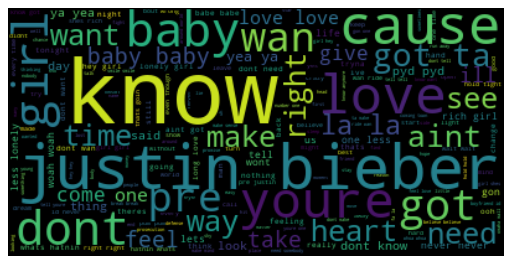

In [66]:
word_cloud(find_artist(pop_artists, "Justin Bieber")["Lyric"])

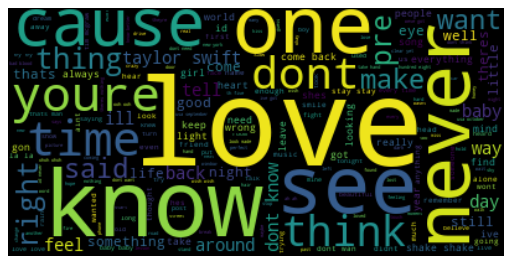

In [67]:
word_cloud(find_artist(pop_artists, "Taylor Swift")["Lyric"])

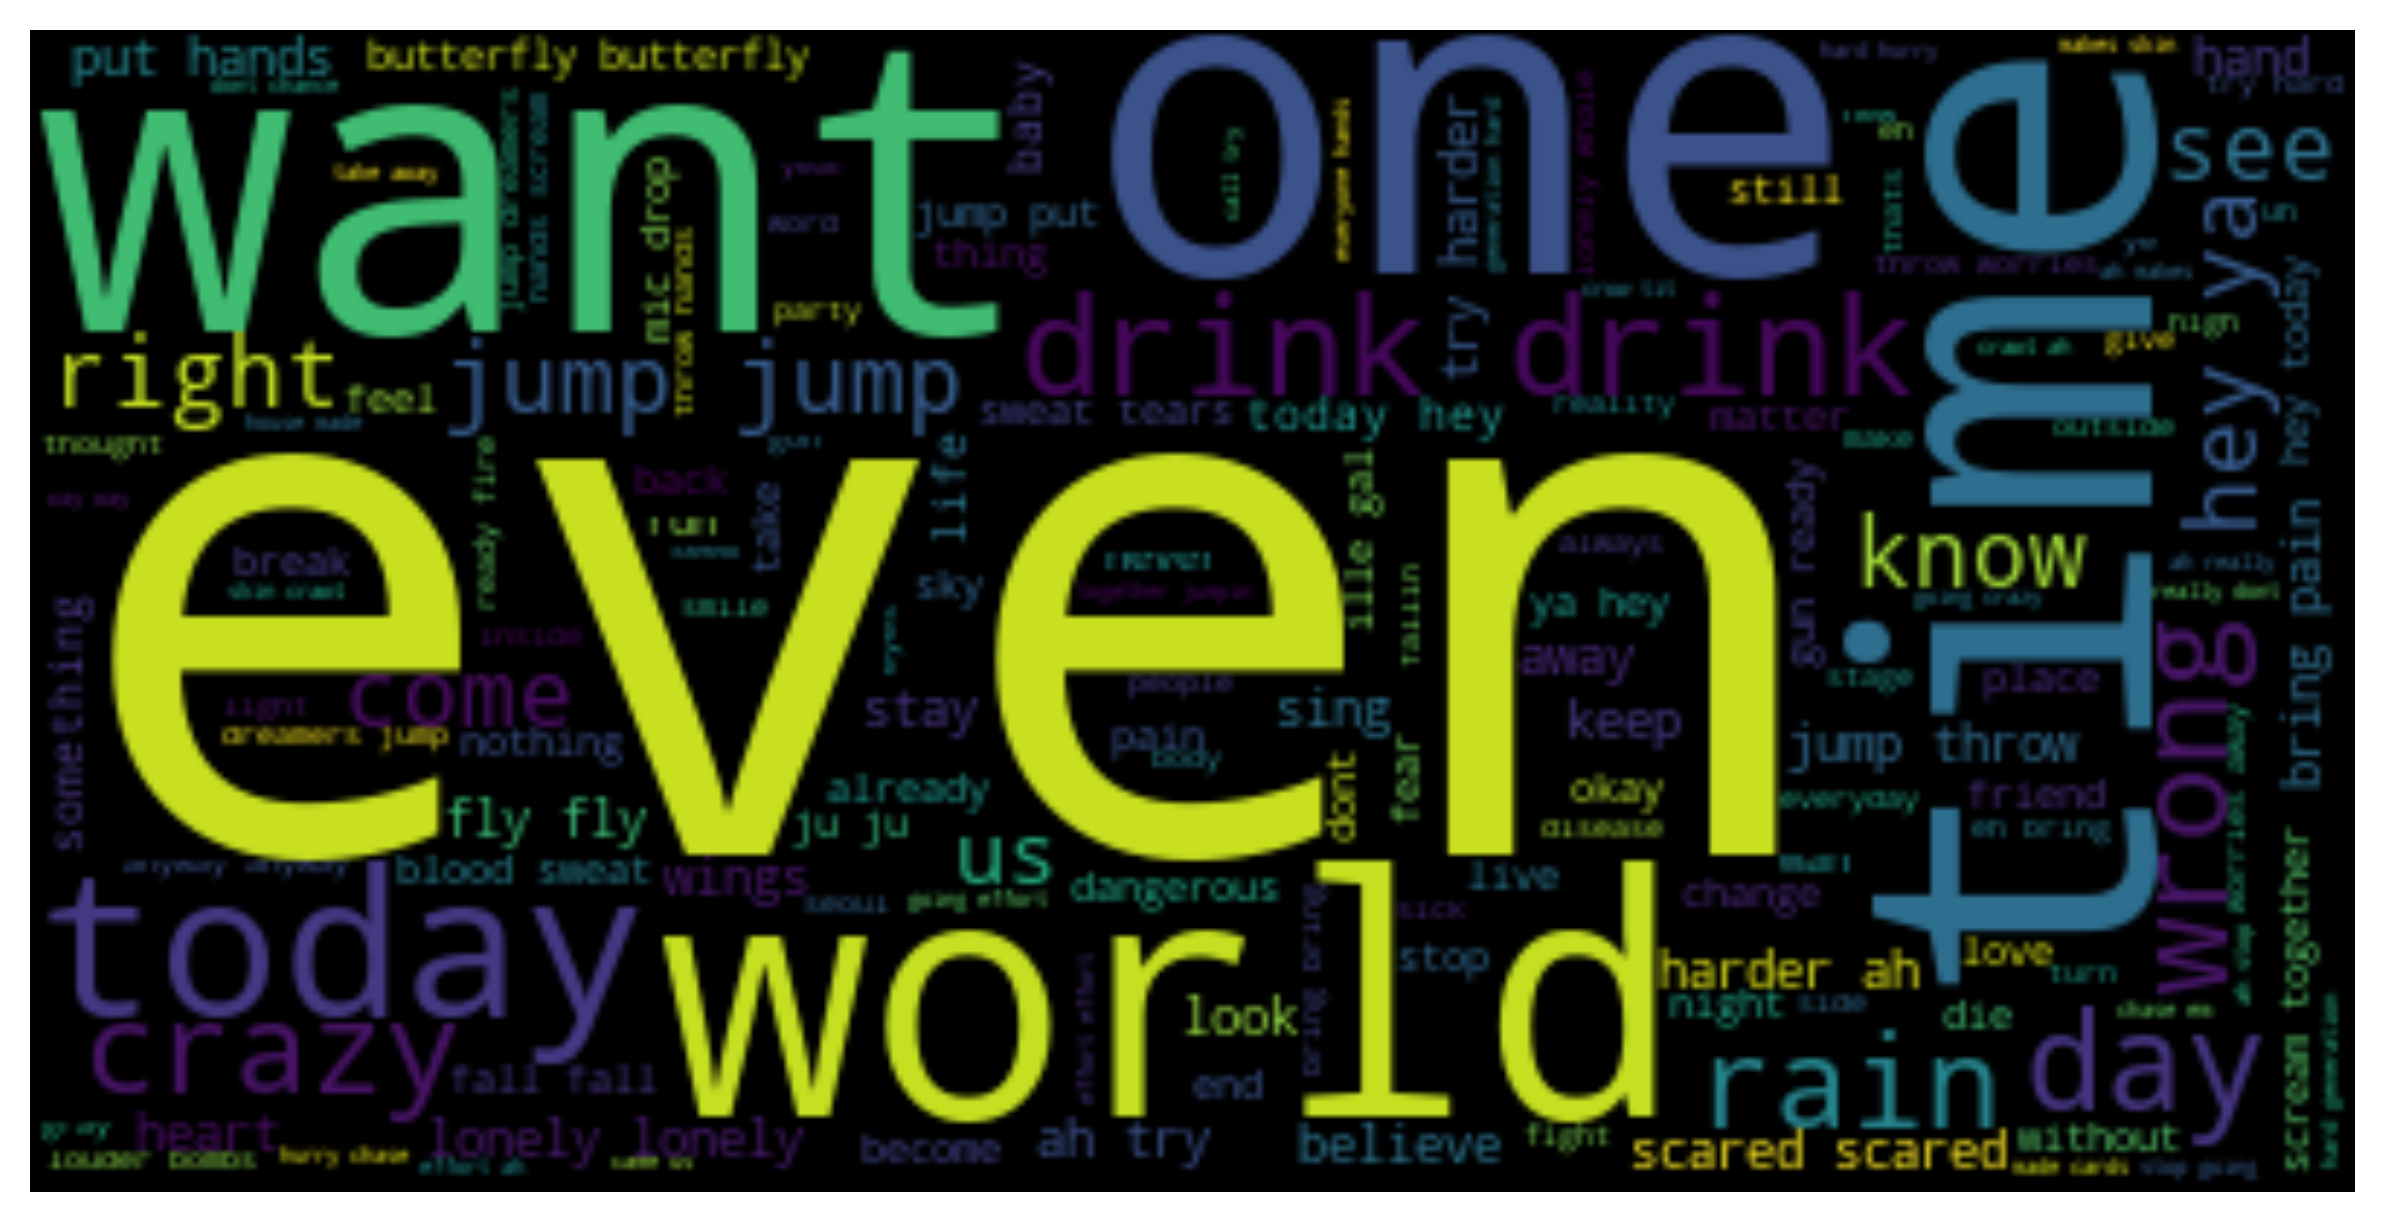

In [68]:
figure(figsize=(10, 8), dpi=300)
wordcloud = WordCloud().generate(" ".join(process(clean_lyrics[clean_lyrics['compound']<0]['clean'])))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

<a name="b"></a>
##**Theory B: Choreography and Energy**

Let's see how BTS's spotify metrics compares with other popular artists.

In [69]:
pop_tracks = spotify[spotify["popularity"]>70] 
#all tracks over a certain popularity threshold of 70
pop_BTS_tracks= pop_tracks[pop_tracks["artists"].str.contains("BTS")] 
#all popular BTS tracks

In [70]:
def samplemean(df, metric):
    return df.sample(25, replace= True)[metric].mean()
def bootstrap(df, metric):
  arr= []
  for i in np.arange(10000):
      x = samplemean(df, metric)
      arr.append(x)
  return arr
def bootstrap_plot(metric):
  sns.histplot(bootstrap(pop_tracks, metric), color = "green", alpha= 0.5, label = "All Artists", kde=True)
  sns.histplot(bootstrap(pop_BTS_tracks, metric), color= "blue", alpha = 0.5, label= "BTS", kde=True)
  plt.xlabel(metric+' Score (by Spotify)')
  plt.ylabel('Frequency')
  plt.title("BTS's "+ metric+ " vs "+metric+" of All Popular Songs")
  plt.legend()
  plt.show();
#helper functions to create distribution histograms

*Try not to run the cells directly below too many times; we are essentially sampling the data 10000 times to create a simulation of the "real" distribution. It should take about a minute or two to run completely.*

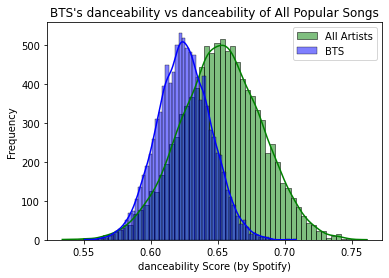

In [71]:
bootstrap_plot("danceability")

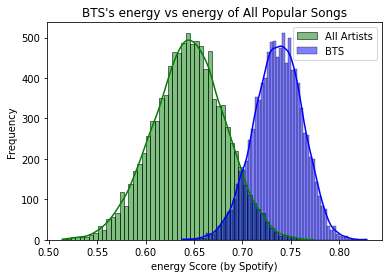

In [72]:
bootstrap_plot("energy")

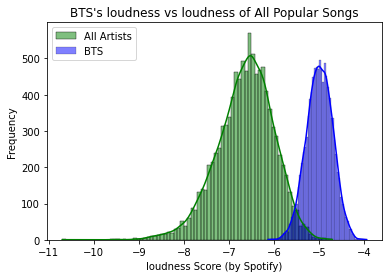

In [73]:
bootstrap_plot("loudness")

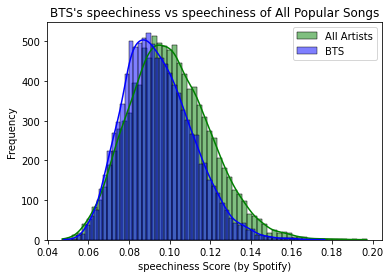

In [74]:
bootstrap_plot("speechiness")

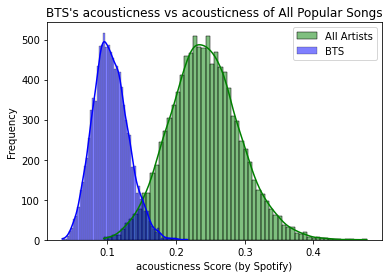

In [75]:
bootstrap_plot("acousticness")

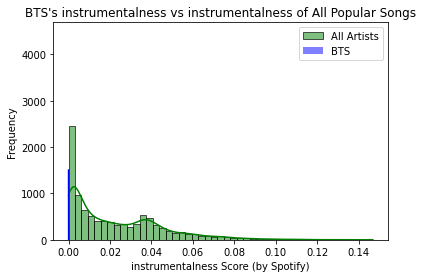

In [76]:
bootstrap_plot("instrumentalness")

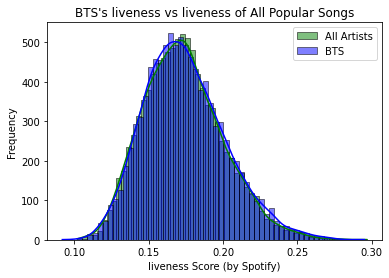

In [77]:
bootstrap_plot("liveness")

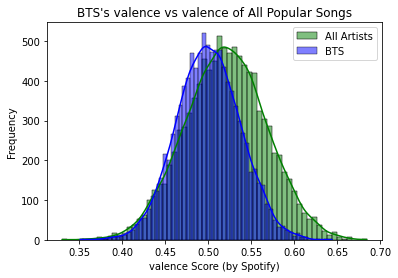

In [78]:
bootstrap_plot("valence")

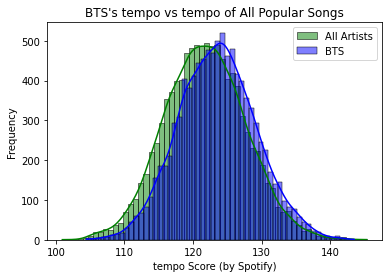

In [79]:
bootstrap_plot("tempo")

In summary, BTS's tracks were on average: <br/><br/>
**Less Danceable**<br/>
**More Energy**<br/>
**More Loud**<br/>
Similar Speechiness<br/>
Less Acousticness<br/>
Less Instrumental<br/>
Indistinguishably Live<br/>
**Similar Positive**<br/>
Similar Tempo<br/>

Most surprisingly, BTS tracks were found to be less danceable. Let's take a closer look at this.

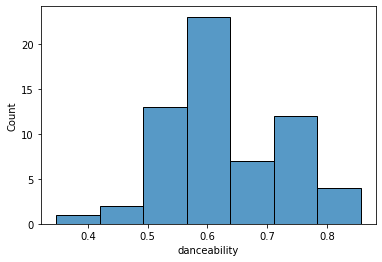

In [80]:
sns.histplot(data= pop_BTS_tracks, x= "danceability"); 
#True distribution of danceability

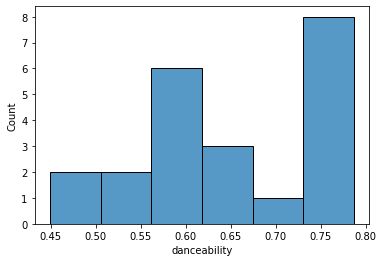

In [81]:
sns.histplot(data = pop_BTS_tracks[pop_BTS_tracks["popularity"]>75], x="danceability");
#Distribution of danceability when we increase the popularity bar to 75
#Formerly the bar of popularity was 70

It seems that when we raise our bar of popularity by 5 points, the distribution shifts right and the mean increases. Let's test this for more iterations on smaller increments.

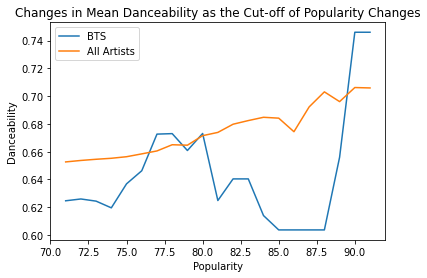

In [82]:
danceability_means_BTS = []
danceability_means_all = []
for i in np.arange(21):
  danceability_means_BTS.append(pop_BTS_tracks[pop_BTS_tracks["popularity"]>70+i]["danceability"].mean())
  danceability_means_all.append(pop_tracks[pop_tracks["popularity"]>70+i]["danceability"].mean())
#These lines of code tells the computer to collect the mean danceability 
#of both popular BTS songs and popular songs (in general) 
#as we raise our "bar of popularity" by one.
sns.lineplot(x= np.arange(len(danceability_means_BTS))+71, y = danceability_means_BTS, label= "BTS")
sns.lineplot(x= np.arange(len(danceability_means_all))+71, y = danceability_means_all, label = "All Artists")
plt.xlabel('Popularity')
plt.ylabel('Danceability')
plt.title("Changes in Mean Danceability as the Cut-off of Popularity Changes")
plt.legend();

This graph tells us an interesting story; It tells us that the "cut-off" of popularity matters when testing for danceability. For BTS's "most popular" songs (popularity score of 89 or above), they are more danceable than the "average" pop song. But for the rest of the graph, danceableability is actually quite lower! **This tells us that the majority of popular BTS songs are not very "danceable" (as measured by Spotify), but the most popular of the popular songs are very danceable.** In other words, we need to make a distinction between "popular" and "very popular." To run the analysis on ALL songs would be computationally and statistically fruitless; there are countless songs on Spotify that have a popularity score of 0 and probably for a good reason. We have to make a "popularity" cut-off somewhere, but as good data scientists, we must understand that popularity is an inherently subjective identity.

In [83]:
pop_BTS_tracks.sort_values("popularity", ascending= False)[["name", "popularity", "danceability"]].head(4) #Tracks by popularity

name  popularity  danceability
92830                     Dynamite          91         0.746
92865                 Life Goes On          89         0.566
93818                     Film out          88         0.499
91927  Boy With Luv (feat. Halsey)          84         0.645

Ah, We can finally see why! It seems that `Dynamite`, BTS's last hit single is quite danceable and very popular (more popular than BTS's other tracks)! We can quite easily see that if we omit `Dynamite` and treat this as an outlier, our graph looks quite different!

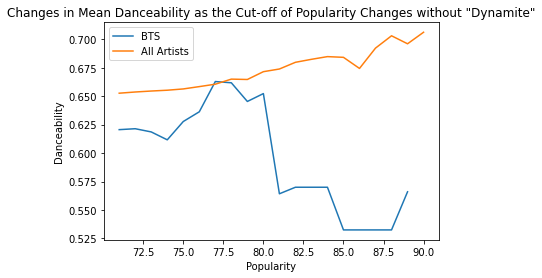

In [84]:
pop_BTS_tracks_2 = pop_BTS_tracks[pop_BTS_tracks["name"]!="Dynamite"] #omits Dynamite
danceability_means_BTS_2 = []
danceability_means_all = []
for i in np.arange(20):
  danceability_means_BTS_2.append(pop_BTS_tracks_2[pop_BTS_tracks_2["popularity"]>70+i]["danceability"].mean())
  danceability_means_all.append(pop_tracks[pop_tracks["popularity"]>70+i]["danceability"].mean())
#These lines of code tells the computer to collect the mean danceability 
#of both popular BTS songs and popular songs (in general) 
#as we raise our "bar of popularity" by one.
sns.lineplot(x= np.arange(len(danceability_means_BTS_2))+71, y = danceability_means_BTS_2, label= "BTS")
sns.lineplot(x= np.arange(len(danceability_means_all))+71, y = danceability_means_all, label = "All Artists")
plt.xlabel('Popularity')
plt.ylabel('Danceability')
plt.title('Changes in Mean Danceability as the Cut-off of Popularity Changes without "Dynamite"')
plt.legend();

Wow! Just the omission of a single track very clearly shows us that BTS's tracks are indeed less danceable than the average pop track!

<a name="c"></a>
##**Theory C: ARMY**

We take data from [Google Trends](https://trends.google.com/trends/) on the number of times BTS was searched on 5 representative countries. Let's take a look at the dataframe and a lineplot of the data.

In [85]:
clean_trends.loc[:, "US":"Philippines"].head()

US  Brazil  South Korea  Mexico  Philippines
time                                                    
2013-07-01   0       0            1       0            3
2013-08-01   0       0            1       0            3
2013-09-01   0       0            1       0            2
2013-10-01   0       0            1       0            4
2013-11-01   0       0            1       0            4

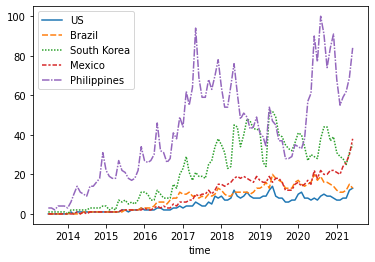

In [86]:
sns.lineplot(data= clean_trends.loc[:, "US":"Philippines"]);

Let's add some more context to our line plot.

In [87]:
song_popularity = pop_BTS_tracks.sort_values("popularity", ascending= False)[["name", "popularity", "release_date"]]
song_popularity = song_popularity.drop_duplicates(subset=["name"])
song_popularity = song_popularity.drop_duplicates(subset=["release_date"])
song_popularity["release_date"]= pd.to_datetime(song_popularity["release_date"])
#Gives us the release date of top BTS songs based on popularity
grouped = merged.sort_values("popularity", ascending= False)[["name", "album_title", "popularity", "release_date"]]
album_popularity= grouped.groupby("album_title").agg(np.mean).merge(merged.sort_values("popularity", ascending= False)[["album_title", "release_date"]], on= "album_title").sort_values("release_date").drop_duplicates(subset= ["album_title"])
#Does the same for albums

Again using our "domain knowledge," we omit the "insignificant" albums. (Non-studio albums/mini-albums)

In [88]:
album_popularity = album_popularity[~album_popularity["release_date"].str.match("2014-05-14")] #Skool Luv Affair (Special Addition) - Rerelease/Special Edition
album_popularity = album_popularity[~album_popularity["release_date"].str.match("2018-08-24")] #LOVE YOURSELF 結 ‘Answer’ - Compilation album
album_popularity = album_popularity[~album_popularity["release_date"].str.match("2020-11-20")] #Dynamite - Single
album_popularity = album_popularity[~album_popularity["release_date"].str.match("2016-05-02")] #The Most Beautiful Moment In Life: Young Forever - Compilation album
album_popularity["release_date"]= pd.to_datetime(album_popularity["release_date"]) 
album_popularity.head()

album_title  popularity release_date
1                                2 Cool 4 Skool   72.000000   2013-06-12
41                                    O!RUL8,2?   59.800000   2013-09-11
45                             Skool Luv Affair   65.200000   2014-02-12
10                                Dark and Wild   61.000000   2014-08-20
59  화양연화 The Most Beautiful Moment In Life Pt.1   64.333333   2015-04-29

In [89]:
be_release_date = datetime.strptime("2020-11-20", "%Y-%m-%d")
be_title = "BE"
#Adds the most recent studio album since our dataset isn't up to date

The code and line chart below plots the popularity of BTS by country along with the release date of their top 10 songs.

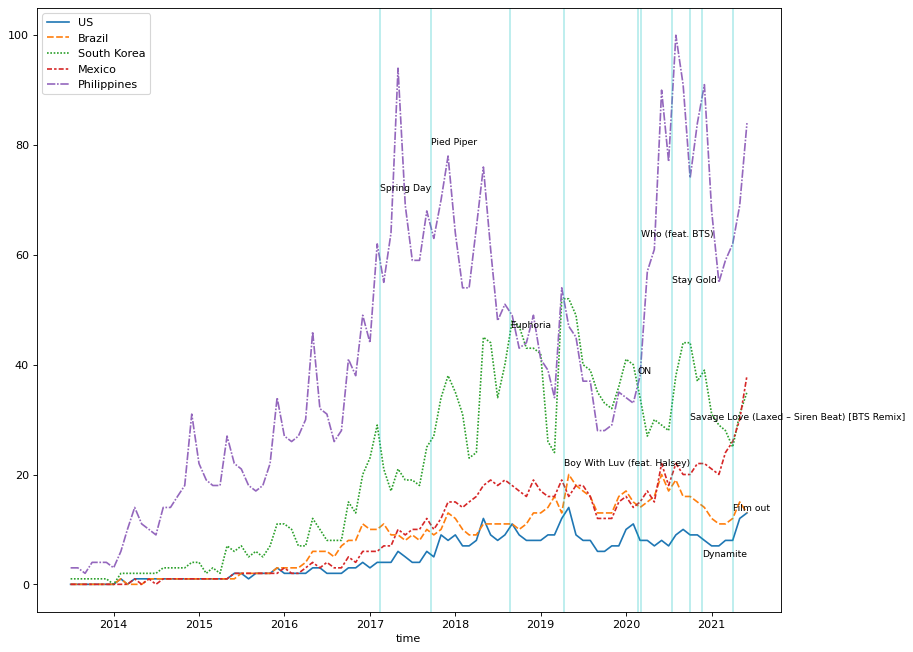

In [90]:
warnings.filterwarnings("ignore")
song_popularity_2 = song_popularity.head(10)
figure(figsize=(12, 10), dpi=80)
sns.lineplot(data = clean_trends.loc[:, "US":"Philippines"])
for i in np.arange(song_popularity_2.shape[0]):
  row = song_popularity_2.iloc[i]
  plt.axvline(row["release_date"], alpha = .3, color = 'c')
  plt.text(row["release_date"], 100/12*i+5, row["name"], size = 'small')
plt.show();

This cell does the same, but just for the albums instead.

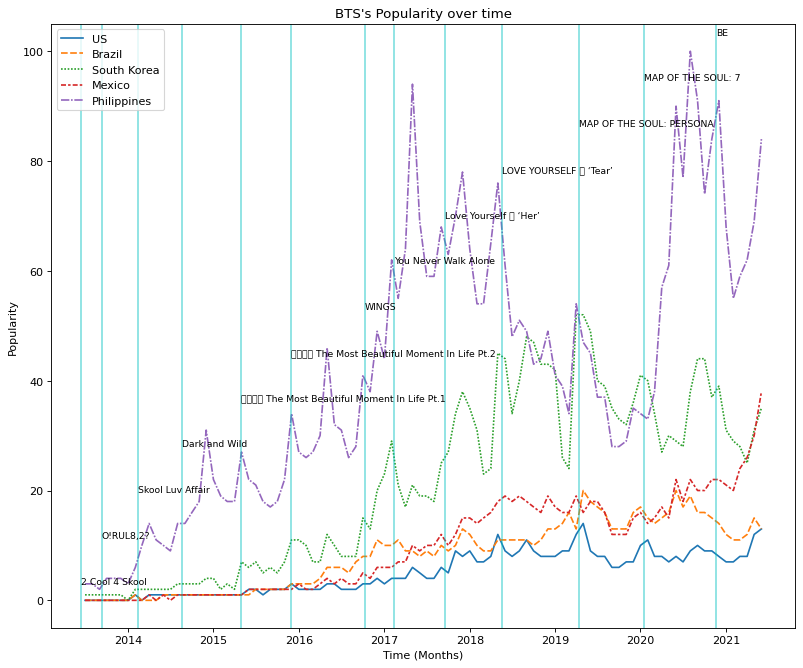

In [91]:
warnings.filterwarnings("ignore")
figure(figsize=(12, 10), dpi=80)
sns.lineplot(data = clean_trends.loc[:, "US":"Philippines"])
for i in np.arange(album_popularity.shape[0]):
  row = album_popularity.iloc[i]
  plt.axvline(row["release_date"], alpha = .5, color = 'c')
  plt.text(row["release_date"], 100/12*i+3, row["album_title"], size = 'small')
plt.axvline(be_release_date, alpha = .5, color = 'c')
plt.text(be_release_date, 100/12*album_popularity.shape[0]+3, be_title, size = 'small')
plt.xlabel('Time (Months)')
plt.ylabel('Popularity')
plt.title("BTS's Popularity over time")
plt.show();

As social data scientists, we have to understand how "popularity" works: <br/><br/>
*It is easier for an artists with 1,000,000 fans to gain 50 more fans than an artist with 100 fans.*
<br/><br/>
In other words, **to make the argument that BTS's popularity is growing, we have to modify our data to reflect percentage changes in BTS's popularity.**
<br/><br/>
Traditionally in data science and statistics, we do this by taking the [natural logarithm](https://en.wikipedia.org/wiki/Log-linear_analysis) of the data.

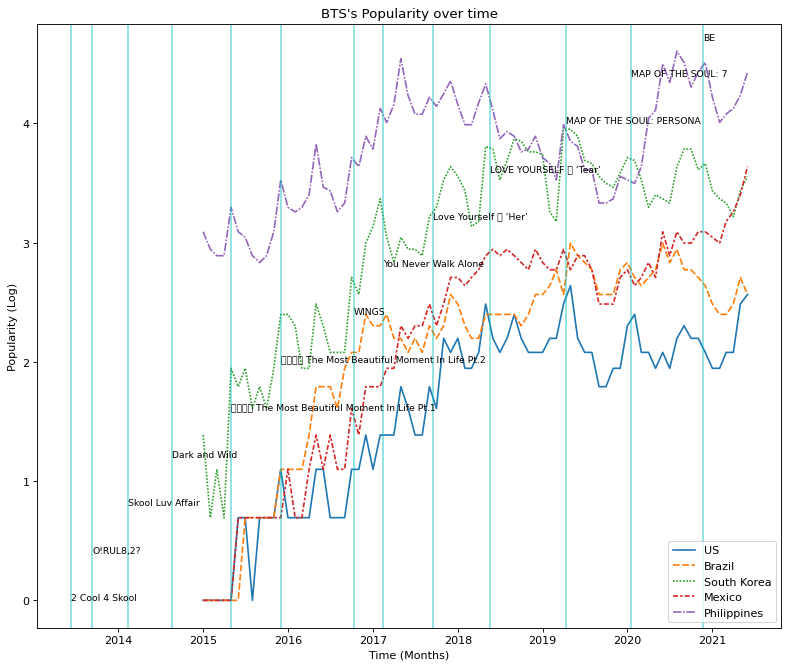

In [92]:
warnings.filterwarnings("ignore")
figure(figsize=(12, 10), dpi=80)
sns.lineplot(data = np.log(clean_trends.loc[:, "US":"Philippines"].loc['2015-01-01':]))
for i in np.arange(album_popularity.shape[0]):
  row = album_popularity.iloc[i]
  plt.axvline(row["release_date"], alpha = .5, color = 'c')
  plt.text(row["release_date"], i/2.5, row["album_title"], size = 'small')
plt.axvline(be_release_date, alpha = .5, color = 'c')
plt.text(be_release_date, 4.7, be_title, size = 'small')
plt.xlabel('Time (Months)')
plt.ylabel('Popularity (Log)')
plt.title("BTS's Popularity over time")
plt.show();

Before we do further analysis, we understand that the line plots can get very visually hectic and confusing.
**We will sum up all the columns** (or add up all the popularity for US, Brazil, South Korea, Mexico and the Philippines) **and set that to "Global Popularity" to show one line plot to clean up our visualizations.** <br/><br/>
Furthermore, we want to reduce the [stochasticity](https://en.wikipedia.org/wiki/Stochastic) of our data. In other words, we want to reduce the random movements and variability of our data. There are many methods of doing this and it is still an area of research within computer science and statistics. **We use a local normalization algorithm** as we deem it as the most simple method. For example, if we were to look at the popularity of BTS on February 2019, we would take the mean of January, February, and March of 2019.
<br/><br/>
Below is the outcome of adding all three transformations to out data. (Natural Logarithm, Totalization, and Local Normalization)

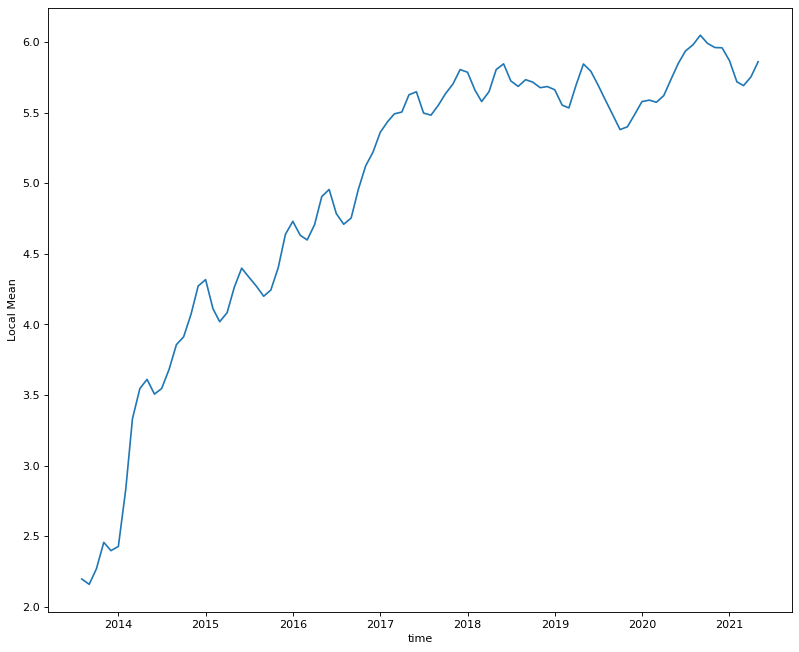

In [93]:
clean_trends["Total"]= clean_trends["US"]+clean_trends["Brazil"]+clean_trends["South Korea"]+clean_trends["Mexico"]+clean_trends["Philippines"]
clean_trends["Local Mean"] = (np.array(clean_trends["Total"])+
                              np.insert(np.array(clean_trends["Total"]), 0, 0)[:-1]+
                              np.append(np.delete(np.array(clean_trends["Total"]), 0),0)/3) #local normalization to stabilize the data
figure(figsize=(12, 10), dpi=80)
sns.lineplot(data = np.log(clean_trends["Local Mean"][1:-1]))
plt.show()

In analyzing time series, there are many discovered by statisticians and alike such as [GLM](https://en.wikipedia.org/wiki/Generalized_linear_model), [autocorrelation](https://en.wikipedia.org/wiki/Autocorrelation), and [Fourier transform](https://en.wikipedia.org/wiki/Fourier_transform), but in the spirit of reducing complexity for the broad audience, we will instead make visual approximations. <br/><br/>
*For more complex analyses, please feel free to access any of the public dataset above, linked respectively.*

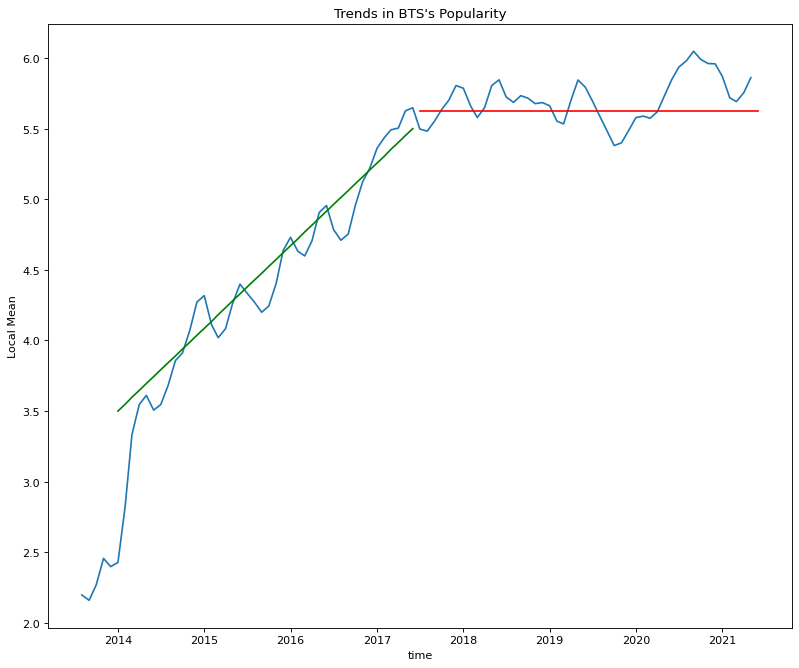

In [94]:
clean_trends["Local Mean"] = (np.array(clean_trends["Total"])+
                              np.insert(np.array(clean_trends["Total"]), 0, 0)[:-1]+
                              np.append(np.delete(np.array(clean_trends["Total"]), 0),0)/3) #local normalization to stabilize the data
figure(figsize=(12, 10), dpi=80)
sns.lineplot(data = np.log(clean_trends["Local Mean"][1:-1]))
x = clean_trends["2014-01-01": "2017-06-01"].index
plt.plot(x , np.linspace(3.5, 5.5 , len(x)), c = 'g')
y = clean_trends["2017-07-01":].index
plt.plot(y , np.repeat(5.625, len(y)), c = 'r')
plt.title("Trends in BTS's Popularity")
plt.show()

In my analysis, **we could see from the green line that we can see that BTS's popularity was rapidly increasing.** Note that if we were to "delog" our data (return it to its state before our transformation), linear increases in logarithmic data is exponential. In other words, during this time period, **BTS's popularity was most likely exponentially increasing in the past.** <br/><br/>

However, the red line seems to suggest that the momentum has phased out. Of course, more data would be needed to be predict the future, but **the narrative that BTS's popularity is still growing at the pace of the past seems to be untrue.** However, it should also should be noted that BTS's popularity does not seem to be decreasing.

In an attempt to cross-validate these results, we also import data from Naver (South Korea's equivalent of Google).

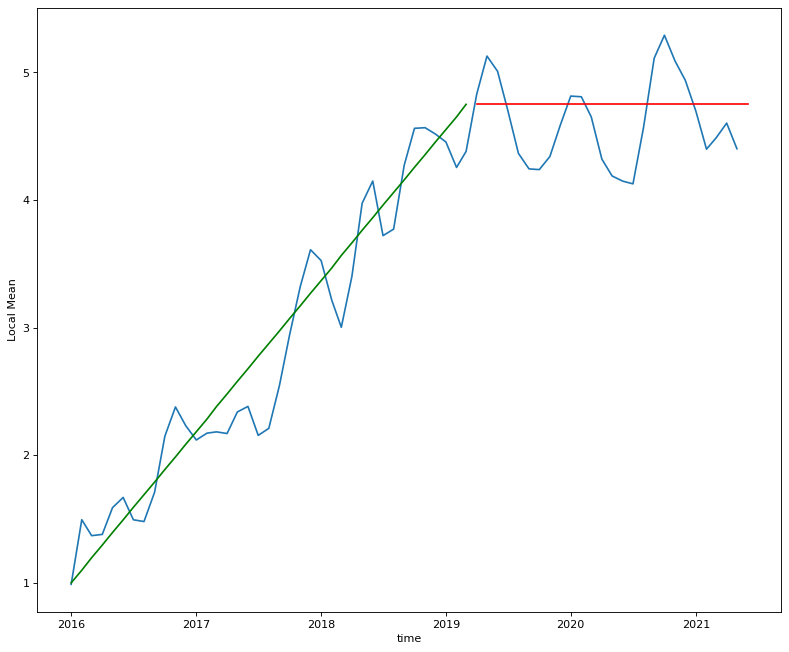

In [95]:
naver["Local Mean"] = (np.array(naver["popularity"])+
                              np.insert(np.array(naver["popularity"]), 0, 0)[:-1]+
                              np.append(np.delete(np.array(naver["popularity"]), 0),0)/3)
figure(figsize=(12, 10), dpi=80)
sns.lineplot(data= np.log(naver["Local Mean"]))
x = clean_trends["2016-01-01": "2019-03-01"].index
plt.plot(x , np.linspace(1, 4.75 , len(x)), c = 'g')
y = clean_trends["2019-04-01":].index
plt.plot(y , np.repeat(4.75, len(y)), c = 'r');

We notice that we can see a similar pattern on this line plot (even though they are from different data sources!) Though the time periods are different, **the growth that BTS has had in the past does not seems to be true of today**.

<a name="conc"></a>
##**Conclusions, Future Questions, Final Thoughts**

###**Theory A**

Theory A was all about analyzing lyrical content to see whether or not BTS's lyrics truly reflected a spirit of "socially concious messaging." That is we wanted to see if we could see through the data whether or not BTS's lyrics truly contained **significant** amounts of negative societal commentary compared to the average artist. <br/><br/>
In our sentiment analysis section, **we showed that BTS's lyrical sentiment**, given by VADER, **was not as negative as popular US artists.** Furthermore, if we deaggregate the data, it turned out that BTS's lyrical sentiment was much closer to artists such as Taylor Swift, who is mainly known for her "vanilla" narrative lyricism. Compared to artists such as Cardi B, Eminem, and Billie Eilish, BTS seemed much more positive.<br/><br/>
In our word cloud section, we took apart BTS's most commonly used words and phrases. **There seemed to be no hint that BTS's songs truly reflected a negative theme**, especially compared to some other artists mentioned above.<br/><br/>
In our analysis, **we find it would be hard to prove that BTS's lyrics truly reflected significant amounts of negative societal commentary.** Of course, it could be that further analysis is needed, particularly with issues of translation and featurization of lyrics. <br/><br/>
However, I believe that it is much more likely, given the copious evidence from VADER and the word cloud, **BTS is not significantly more negative than the average artist.** However, it would also be incorrect to say that BTS has **no** negativity in their lyrics or that BTS's **significantly less** negative than the average artist. Instead, **I propose a new theory that BTS has the "correct" amount of negativity, which led to ascendancy to fame.** As stated before, BTS's sentiment scores are in-line with some other popular artists such as Taylor Swift. And our analysis also fails to show that BTS's lyrics are **completely positive**. BTS's lyrics seems to contain a balence of positive and negative sentiments that seems to agree with most pop artists of the time.


###**Theory B**

Theory B was about taking pre-analyzed features from Spotify such as danceability, energy, loudness, speechiness, acousticness, etc and running a bootstrap analysis. Here are the results of our analysis again from above.

In summary, BTS's tracks were on average: <br/><br/>
**Less Danceable**<br/>
**More Energy**<br/>
**More Loud**<br/>
Similar Speechiness<br/>
Less Acousticness<br/>
Less Instrumental<br/>
Indistinguishably Live<br/>
**Similar Positive**<br/>
Similar Tempo<br/>

We want to give attention to the features danceability, energy and loudness. BTS had higher energy and loudness that were shown to be **statistically significant**. **This is in-line with the theory that BTS is more energetic and gives listeners a boost of spirit and the results of our study agree.** <br/><br/>
However, our interpretation of danceability is mixed. Our results show that the danceability metric of BTS various on which standard of popularity we choose for tracks. **The majority of popular BTS songs are not very danceable, but the most popular of the popular songs are very danceable.** Furthermore, the "most popular songs" we refer to may just be the recent single "Dynamite."<br/><br/>

**In the end, I leave the interpretation of danceability up to the reader.**<br/><br/>

It could be that **"Dynamite" is a statistical outlier** (as it is clear it skews our data towards a certain direction apart from the other data points) and BTS tracks are indeed less danceable. <br/><br/>

Or it could be that **"Dynamite" is a "good" representation of BTS**, given its critical acclaim and success. The next logical step of this interpretation would be that the "results are inconclusive" (which is totally okay in the field of data science!). <br/><br/>

I would encourage the readers of this notebook to think for themselves and give their own interpretation. (But of course, it should be still supported by data!)



###**Theory C**

Theory C explored the change in BTS's popularity using the number of times BTS was searched on popular search engines. <br/><br/>

**Our analysis can easily conclude that there are "seasonal variations" in BTS's popularity, which locally peaks around months where they release a new album. Contrary to the analysis of the media, BTS, like all other artists, is susceptible to trends, seasonality, and randomness.**<br/><br/>

And with our data transformations in place, I can also conclude that BTS's roaring popularity has come to a time of stabilization. Our line graph shows a time of rapid growth followed by a period of stability. We cross validate this finding with across other search engines (Naver) and find similar results, which further adds credibility to our analysis.<br/><br/>

Therefore, the statement that BTS fans are "consistent" and "exponentially growing" would both be provably false statements. BTS, like all artists of the world, is susceptible to trends and cannot keep growing exponentially consistently. **However, it is to note BTS is yet to fall out of the eye of the public sphere** as our analysis also leads to the conclusion that BTS has reached a time of stabilization among its fanbase. If our analysis is indeed true, **BTS will most likely maintain its already vast popularity and will continue to catch the attention of the public and the media for at least the near future as the popularity of BTS does not seem to show any signs of decreasing. (though it is not necessarily increasing)**

In summary, <br/>
**it does not seem that BTS's lyrical content is particularly socially concious or critical towards society (at least compared to the average pop artist in the US)** <br/>
**but it does seem to be true that BTS's music is particularly high energy and upbeat.**<br/>
**BTS's popularity seems to have grown exponentially in the past and is now coming to an age of stabilization, though there does not seem to be a sign of decreasing.**

###**Future Questions**

Some future questions I would like to explore (or I would like the audience to explore!) would be to utilize more complex tools such as [TensorFlow](https://en.wikipedia.org/wiki/TensorFlow), [Apache Spark](https://en.wikipedia.org/wiki/Apache_Spark), and [PyTorch](https://en.wikipedia.org/wiki/PyTorch) to analyze the data. The initial attempt included an attempt to equip this notebook with [scikit-learn](https://en.wikipedia.org/wiki/Scikit-learn) and the [tf-idf](https://en.wikipedia.org/wiki/Tf%E2%80%93idf) function to vectorize the texts and use TruncatedSVD to perform a [dimensionality reduction](https://en.wikipedia.org/wiki/Dimensionality_reduction) on the resulting SVD. This approach was a failure due to its lack of explainability of variability (only 0.04) on 2 dimensions and lack of explainability in the model. I assume that stronger tools will be much more capable in doing the analysis, especially in the themeatic analysis and time-series analysis portions and will hopefully will lead to more nuanced results.

###**Final Thoughts**

Overall, I found much enjoyment in doing this project, from picking an initial idea to build a story on to importing and utilizing various Python libraries. <br/><br/>
I would like to thank Professor Adam Anderson, GSI Ash Tan, and GSR Anusha Subramanian for their assistance and comments. This project could not be possible without their valuable comments on my project and their smooth administration of the course [Digital Humanities 100](https://summerdigitalhumanities.berkeley.edu/courses).<br/><br/>
I would also like to thank my fellow classmates in DH 100 for Summer 2021 (which will hopefully be the last of the online semester of the COVID-19 pandemic). Their comments and encouragement (particularly of Random Room 10's!) were helpful in the creation of this notebook. <br/><br/>
Finally, I would like to thank you, the reader, for getting through this very, very long digital notebook. Congratulations on getting to the end. I hope that this notebook has encourged to take your studies further in the field of data science. 